<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/01_nn_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit for the model

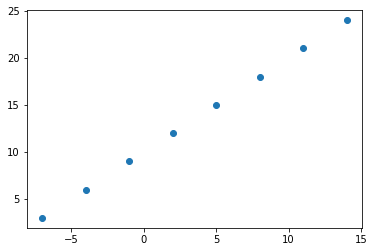

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes


In [4]:
#creating a demo tensor for housing prediction model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
#turning numpy arrays into tensors

In [8]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modleing wiht TF
###Create Model
###Compile Model: Loss and Optimization
###Fitting a model

In [10]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create. model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)




Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
#Check out X and Y
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#make a prediction using model
y_pred = model.predict([17.0])

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

#Improving models performance

In [14]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 772ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [15]:
#Reminder of Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
#model evaluation once again
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
#rebuilding model with a different neural network
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 796ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 16m

In [18]:
#model evaluation once again
model.predict([17.0])

array([[31.223137]], dtype=float32)

##Common ways to improve a model
###Adding Layers
###Increase the number of hidden neurons
###Change activation function
###Change optimization function
###Change Learning Rate


In [19]:
#rebuilding model with a different learning rate
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.7255 - mae: 12.7255
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7171 - mae: 12.7171
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7087 - mae: 12.7087
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 12.7003 - mae: 12.7003
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6919 - mae: 12.6919
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6834 - mae: 12.6834
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 12.6750 - mae: 12.6750
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6666 - mae: 12.6666
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6582 - mae: 12.6582
Epoch 11/100
1/1 [==============================] - 0s

##Evaluating a Model

In practice a typical workflow youll go thorugh when building nn is:
buld a model -> fit model -> evaluate -> tweak and repeat

In [20]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.2296 - mae: 13.2296
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 13.1890 - mae: 13.1890
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 13.1483 - mae: 13.1483
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 13.1076 - mae: 13.1076
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0670 - mae: 13.0670
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 13.0263 - mae: 13.0263
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 12.9856 - mae: 12.9856
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 12.9448 - mae: 12.9448
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 12.9039 - mae: 12.9039
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 12.8634 - mae: 12.8634
Epoch 11/100
1/1 [==============================] -

###When it comes to evaluating models: Visualize, Visualize and Visualize

#Its a good ideaa to visualize:
- The Data
- The model
- The training
- The predictions

In [21]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

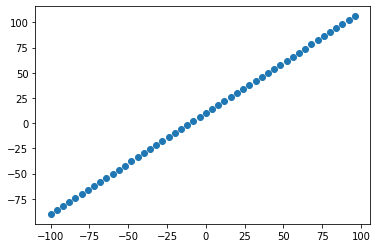

In [23]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets
- Training (model learns from this data) 70-80%
- Validation set (the model gets tuned on this data, which is typicall 10-15%
- Test Set (model gets evaluated on this set, 10-15%)

In [24]:
#Check the length of how mahy sammples we have
len(X), len(y)

(50, 50)

In [25]:
#split the data into train and test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(y_test)

(40, 10)

#Lets visualize our data 


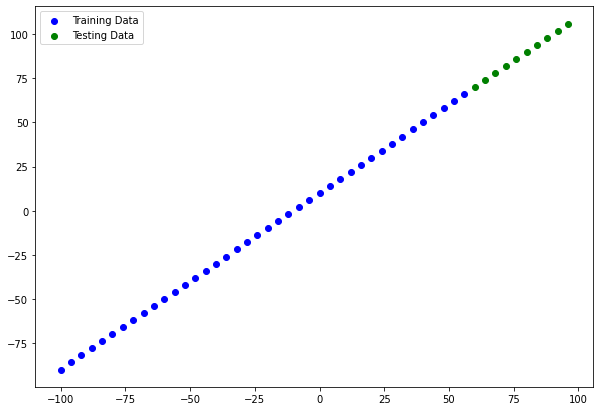

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

#How to build a neural network for the data


In [27]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [28]:
##Visualizing the model

In [29]:
#Creatint a model which builds automatically based on input shape
tf.random.set_seed(42)

#create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1, name="output_layer")                 
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#Total Params = Total number of parameters in the model
#Trainable Parametrs - these are the parameters or patters that the model can update as it trains
#Non-trainable parameters- these parameters are not updated during training, comonly used when you bring in already learn patters or parametrs during transfer learning

In [31]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

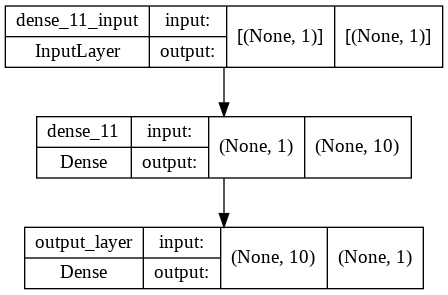

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#Visualizing the models predictions

In [33]:
#making predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

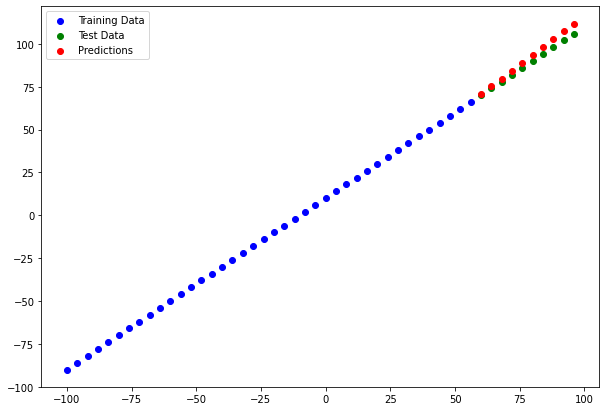

In [35]:
#Lets create a plotting function
def plot_predictions(
    train_data = X_train, 
    train_labels = y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

plot_predictions()


In [36]:
#Evaluation Metrics
#Retruns loss and evaluation metric
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 172ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [37]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
#Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [40]:
y_pred = tf.squeeze(y_pred)

In [41]:
#Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [42]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [43]:
#making functions for mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))
def mse(y_true, y_test):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))

###Running experiements to improve model

In [44]:
#Three modeling experiments
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [45]:
tf.random.set_seed(42)

#create 1st model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

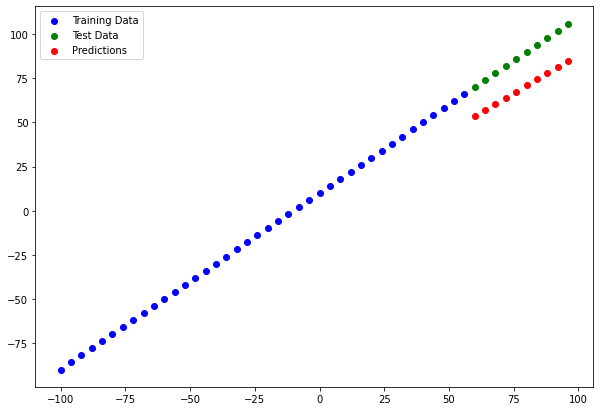

In [46]:
#Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [47]:
#Calculate evaluations metrics
mae_1 = mae(y_test, (y_preds_1))
mse_1 = mse(y_test, (y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [48]:
tf.random.set_seed(42)

#create 2nd model with 100 hidden units
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(100)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 40.1504 - mae: 40.1504
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 39.9948 - mae: 39.9948
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 39.8037 - mae: 39.8037
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 39.5905 - mae: 39.5905
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 39.3402 - mae: 39.3402
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 39.0650 - mae: 39.0650
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 38.7490 - mae: 38.7490
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 38.3521 - mae: 38.3521
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 37.8211 - mae: 37.8211
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 37.2500 - mae: 37.2500
Epoch 11/100
2/2 [==============================] - 0s 5ms

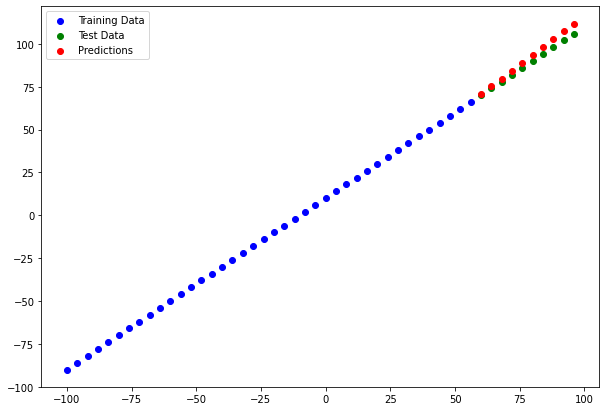

In [49]:
plot_predictions(predictions=y_pred)

ValueError: ignored

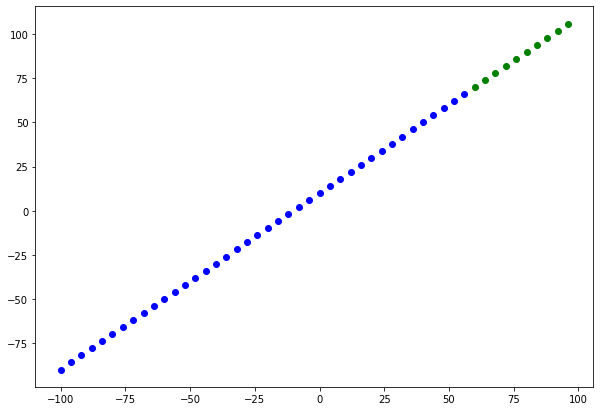

In [51]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [52]:
#calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

InvalidArgumentError: ignored

In [53]:
tf.random.set_seed(42)

#create 3rd model with 2 layers and 500 epochs
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms

In [ ]:
#make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
#Calcualte model 3 eval metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

#Comparing results

In [54]:
import pandas as pd
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
                 
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

NameError: ignored

#Tensorboard and Weights and Biases

## Saving our models


###There are two main formats for saving
####Save Model and HDF5 Formats

In [57]:
model_2.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [58]:
model_2.save("best_model_HDF5_format.h5")

#Loading model

In [60]:
#load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")

In [61]:
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 100)               200       
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 100)               200       
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


In [63]:
#comparing model_2 and loaded model 2
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)



In [64]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tru

In [65]:
model_2_preds.squeeze()

array([[55.0238  , 54.974503, 54.96919 , 54.818645, 54.82324 , 54.96882 ,
        55.026657, 55.015633, 54.820526, 55.018494, 54.997757, 55.019123,
        54.96615 , 54.972103, 55.017803, 54.996384, 54.99982 , 54.82014 ,
        54.972687, 54.99788 , 55.013554, 54.814613, 55.01816 , 54.82711 ,
        54.825703, 54.824104, 54.965855, 54.974586, 54.99796 , 54.985924,
        55.049927, 55.014942, 55.022755, 54.822033, 54.970284, 54.97634 ,
        54.824196, 54.97176 , 54.82262 , 54.82216 , 55.017246, 54.99696 ,
        54.96995 , 54.81039 , 54.82391 , 54.830204, 54.81195 , 55.0002  ,
        54.96745 , 54.977234, 54.98146 , 54.974224, 55.001953, 54.97995 ,
        54.82048 , 54.977505, 55.022587, 54.980972, 54.970642, 54.970535,
        54.84546 , 55.05609 , 54.821255, 54.80887 , 54.824474, 54.99632 ,
        54.82329 , 54.977455, 54.81899 , 55.00422 , 54.8213  , 54.980244,
        54.9849  , 54.99674 , 54.975464, 54.977676, 55.062325, 54.97903 ,
        54.96602 , 55.02099 , 54.96534

In [67]:
loaded_SavedModel_format_preds

array([[55.0238  , 54.974503, 54.96919 , 54.818645, 54.82324 , 54.96882 ,
        55.026657, 55.015633, 54.820526, 55.018494, 54.997757, 55.019123,
        54.96615 , 54.972103, 55.017803, 54.996384, 54.99982 , 54.82014 ,
        54.972687, 54.99788 , 55.013554, 54.814613, 55.01816 , 54.82711 ,
        54.825703, 54.824104, 54.965855, 54.974586, 54.99796 , 54.985924,
        55.049927, 55.014942, 55.022755, 54.822033, 54.970284, 54.97634 ,
        54.824196, 54.97176 , 54.82262 , 54.82216 , 55.017246, 54.99696 ,
        54.96995 , 54.81039 , 54.82391 , 54.830204, 54.81195 , 55.0002  ,
        54.96745 , 54.977234, 54.98146 , 54.974224, 55.001953, 54.97995 ,
        54.82048 , 54.977505, 55.022587, 54.980972, 54.970642, 54.970535,
        54.84546 , 55.05609 , 54.821255, 54.80887 , 54.824474, 54.99632 ,
        54.82329 , 54.977455, 54.81899 , 55.00422 , 54.8213  , 54.980244,
        54.9849  , 54.99674 , 54.975464, 54.977676, 55.062325, 54.97903 ,
        54.96602 , 55.02099 , 54.96534

In [68]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [70]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tru

#Downloading a model from Google Colab


In [71]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#larger dataset

In [73]:
#Medical Cost Dataset

In [74]:
#import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [77]:
#Time to one-hot encode these columns

In [78]:
insurance.get_dummies()

AttributeError: ignored

In [79]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [80]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
